In [6]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.special

In [7]:
import matplotlib.pyplot as plt

In [8]:
from quickplot import QuickPlot

# Generalized Binomial Distribution

A generalized binomial distribution $Y \sim\mathrm{GBinom}\left(n,\tau,\rho\right)$ for the sum of samples $Y=\sum_{i=0}^n{X_i}$ with sample success probability $\tau$ and pairwise correlation between the samples $\mathrm{corr}{\left[X_i, X_j\right]}=\rho$ maintaining the usual probabilities $\mathrm{E}{\left[X_i\right]}=n\tau$
and $\mathrm{Var}{\left[X_i\right]}=n\tau(1-\tau)$

The distribution has the following form

$P\left(Y=0\right)=\rho\left(1-\tau\right)+\left(1-\rho\right)\left(1-\tau\right)^n$ so the case $x=0$

$P\left(Y=x\right)=\left(1-\rho\right)\begin{pmatrix}n\\x\end{pmatrix}\left(1-\tau\right)^{n-x}\tau^x$ for every $x=1,\ldots,n-1$

$P\left(Y=n\right)=\rho\tau+\left(1-\rho\right)\tau^n$ so the case $x=n$

### Implemetation and visualization

In [9]:
def pGBinom(x,n,tau,rho):
    pxj = (1-rho)*sp.special.comb(n,x)*tau**x*(1-tau)**(n-x)
    px0 = rho*(1-tau)+(1-rho)*(1-tau)**n
    pxn = rho*tau+(1-rho)*tau**n
    p = np.where(x==0,px0,pxj)
    p = np.where(x==n,pxn,p)
    return np.maximum(p,np.zeros_like(p))

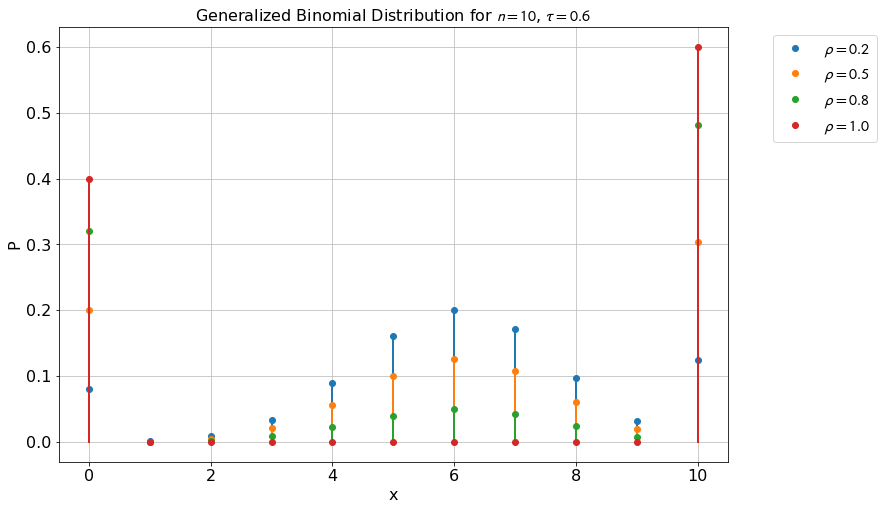

In [21]:
n = 10
tau = 0.6
rho = 0.2
with QuickPlot() as qp:
    x = np.arange(0,n+1)
    for rho in [0.2,0.5,0.8,1.0]:
        p = pGBinom(x,n,tau,rho)
        c = qp.ax._get_lines.get_next_color()
        qp.plot(x,p,linestyle='',marker='o', label=r'$\rho={}$'.format(rho),color=c)
        for i in x:
            qp.plot([i,i],[0,p[i]],color=c, lw=2)
            
    qp.set_all_xlabels('x')
    qp.set_all_ylabels('P')
    qp.ax.set_title(r'Generalized Binomial Distribution for $n={}$, $\tau={}$'.format(n,tau))

## Bayes inference

If one takes a bayes statistical view one can use a distribution for the hyperparameter $\tau$.

### Uniform Prior

The naive startingpoint if nothing is known about the success probability of the underlying process, is to use a uniform distribution over the Interval $\left[0,1\right]$

Here the distribution evaluated as function of $\tau$ directly yields the posterior probabilty as $P\left(\tau|x,n,\rho\right)=P\left(x|n,\tau,\rho\right)\cdot P\left(\tau\right) = P\left(x|n,\tau,\rho\right)\cdot 1 $

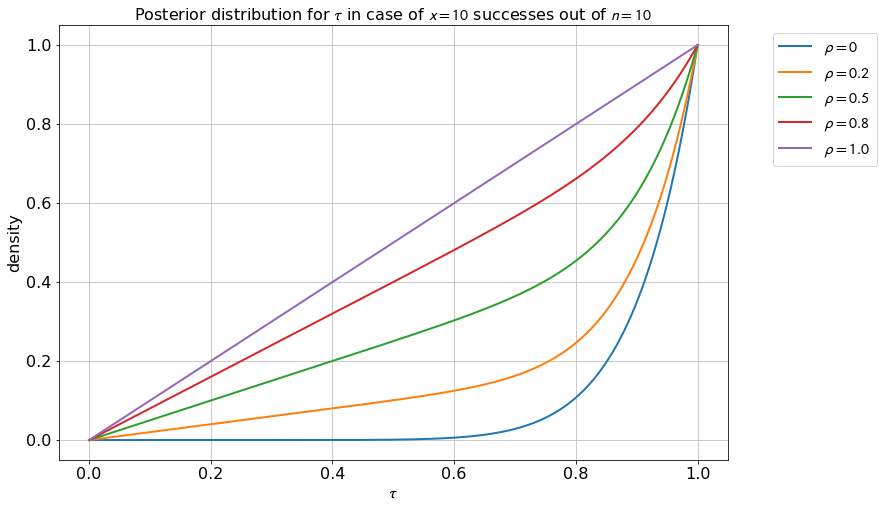

In [47]:
x = 10
n = 10
with QuickPlot() as qp:
    tau = np.linspace(0,1,1000)
    
    for rho in [0,0.2,0.5,0.8,1.0]:
        qp.plot(tau,pGBinom(x,n,tau,rho),label=r'$\rho={}$'.format(rho))
        
    
    qp.set_all_xlabels(r'$\tau$')
    qp.set_all_ylabels('density')
    qp.ax.set_title(r'Posterior distribution for $\tau$ in case of $x={}$ successes out of $n={}$'.format(x,n))

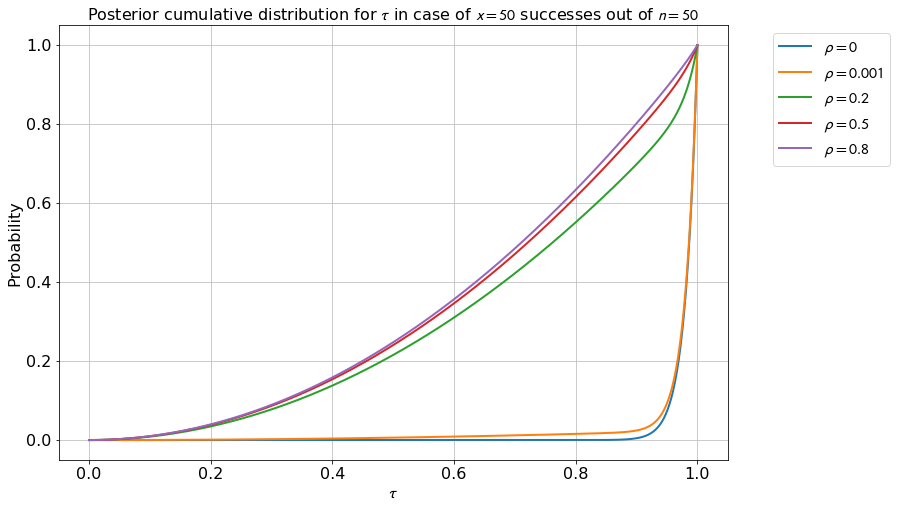

In [50]:
x = 50
n = 50
with QuickPlot() as qp:
    tau = np.linspace(0,1,1000)
    dtau = np.mean(np.diff(tau))
    
    for rho in [0,0.001,0.2,0.5,0.8]:
        dptau = pGBinom(x,n,tau,rho)
        qp.plot(tau,np.cumsum(dptau)/np.sum(dptau),label=r'$\rho={}$'.format(rho))
        
    
    qp.set_all_xlabels(r'$\tau$')
    qp.set_all_ylabels('Probability')
    qp.ax.set_title(r'Posterior cumulative distribution for $\tau$ in case of $x={}$ successes out of $n={}$'.format(x,n))